In [1]:
import seaborn as sns  
import pandas as pd  
import matplotlib.pyplot as plt 

# To make a plot of time series, I want to get the mean steps per day over all participants, need only data from steps.csv
# data pre-processing steps,get the head() of the resulting data frame
df1 = pd.read_csv('steps.csv',sep = ';') 
df1.head() 

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df2 = pd.read_csv('survey.csv')
df2.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [3]:
df = pd.merge(df1, df2, on = 'id') #'id' is the common identifier
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [4]:
# The apply method of a dataframe lets us apply a function to all the elements.
df['weight'] = df['weight'].apply(pd.to_numeric, errors='coerce')

# remove the unreasonable weight value, create a function that we then apply to the entire column
def check_weight(x):
    if(x > 180 or x < 35): 
        return float('NaN')
    else: 
        return x
df['weight'] = df['weight'].apply(check_weight)
print(df)

      id  20-6-2013  21-6-2013  22-6-2013  23-6-2013  24-6-2013  25-6-2013  \
0      1        NaN        NaN        NaN        NaN     3941.0    15733.0   
1      2        NaN        NaN    10473.0      705.0     4287.0     5507.0   
2      3        NaN    11428.0    12523.0     2553.0      190.0     2164.0   
3      4        NaN        NaN        NaN        NaN        NaN        NaN   
4      5        NaN        NaN        NaN        NaN        NaN        NaN   
..   ...        ...        ...        ...        ...        ...        ...   
924  925        NaN     4571.0    10471.0     5899.0    15295.0     9178.0   
925  926        NaN        NaN        NaN        NaN        NaN        NaN   
926  927        NaN        NaN        NaN     1623.0        NaN        NaN   
927  928        NaN        NaN    14411.0    14364.0    26629.0    13092.0   
928  929        NaN     3324.0     4507.0    14364.0     4098.0     7299.0   

     26-6-2013  27-6-2013  28-6-2013  ...  12-5-2014  13-5-2014

In [11]:
# Make three datasets , people of 10 most heaviest ,10 most lightest weight and of all participants, 
df_sorted_01 = df.sort_values(by='weight', ascending=False)
df_sorted_02 = df.sort_values(by='weight', ascending=True)
df_weight_high = df_sorted_01.head(10)
df_weight_low = df_sorted_02.head(10) 

In [55]:
# to get mean steps of both data sets, I need to save only steps values  
df_steps_weight_high = df_weight_high.drop(["id","city","gender","age","hh_size","education","education_1","height","weight"],axis=1)
df_steps_weight_low = df_weight_low.drop(["id","city","gender","age","hh_size","education","education_1","height","weight"],axis=1)
df_steps_weight_total = df.drop(["id","city","gender","age","hh_size","education","education_1","height","weight"],axis=1)

df_mean_steps_weight_high = df_steps_weight_high.mean(axis = 0)
df_mean_steps_weight_low = df_steps_weight_low.mean(axis = 0)
df_mean_steps_weight_total = df_steps_weight_total.mean(axis = 0)

#print(df_mean_steps_weight_high)
#print(df_mean_steps_weight_low)
print(df_mean_steps_weight_total)

20-6-2013     3642.416667
21-6-2013     9034.724280
22-6-2013    10889.636691
23-6-2013     7402.847973
24-6-2013     8110.370056
                 ...     
9-5-2014      9570.690141
10-5-2014     7614.848837
11-5-2014     6805.925926
12-5-2014     7505.530303
13-5-2014             NaN
Length: 328, dtype: float64


In [56]:
# Output from above has no column name.To make the line plot, I need dataframe with named columns
# so I make a new dataframe, give columns names.

date01 = pd.to_datetime(df_mean_steps_weight_high.index,format='%d-%m-%Y')
mean_steps_weight_high = pd.DataFrame({'date':date01,'steps':df_mean_steps_weight_high})
#print(mean_steps_weight_high)

date02 = pd.to_datetime(df_mean_steps_weight_low.index,format='%d-%m-%Y')
mean_steps_weight_low = pd.DataFrame({'date':date02,'steps':df_mean_steps_weight_low})
#print(mean_steps_weight_low)

date = pd.to_datetime(df_mean_steps_weight_total.index,format='%d-%m-%Y')
mean_steps_weight_total = pd.DataFrame({'date':date,'steps':df_mean_steps_weight_total})
print(mean_steps_weight_total)

    

                date         steps
20-6-2013 2013-06-20   3642.416667
21-6-2013 2013-06-21   9034.724280
22-6-2013 2013-06-22  10889.636691
23-6-2013 2013-06-23   7402.847973
24-6-2013 2013-06-24   8110.370056
...              ...           ...
9-5-2014  2014-05-09   9570.690141
10-5-2014 2014-05-10   7614.848837
11-5-2014 2014-05-11   6805.925926
12-5-2014 2014-05-12   7505.530303
13-5-2014 2014-05-13           NaN

[328 rows x 2 columns]


In [57]:
# check if there is unreasonable steps data  
print(mean_steps_weight_high.sort_values(by='steps', ascending=False))
print(mean_steps_weight_low.sort_values(by='steps', ascending=False))
print(mean_steps_weight_total.sort_values(by='steps', ascending=False))

                date     steps
28-3-2014 2014-03-28  999999.0
22-9-2013 2013-09-22   34346.0
12-7-2013 2013-07-12   25125.0
15-7-2013 2013-07-15   18455.5
21-1-2014 2014-01-21   15725.0
...              ...       ...
9-5-2014  2014-05-09       NaN
10-5-2014 2014-05-10       NaN
11-5-2014 2014-05-11       NaN
12-5-2014 2014-05-12       NaN
13-5-2014 2014-05-13       NaN

[328 rows x 2 columns]
                date         steps
22-6-2013 2013-06-22  24802.000000
11-1-2014 2014-01-11  23192.333333
30-8-2013 2013-08-30  20751.333333
1-3-2014  2014-03-01  18666.000000
12-1-2014 2014-01-12  16366.500000
...              ...           ...
9-5-2014  2014-05-09           NaN
10-5-2014 2014-05-10           NaN
11-5-2014 2014-05-11           NaN
12-5-2014 2014-05-12           NaN
13-5-2014 2014-05-13           NaN

[328 rows x 2 columns]
                 date         steps
26-3-2014  2014-03-26  31127.801471
28-3-2014  2014-03-28  30744.365854
22-4-2014  2014-04-22  29415.617647
25-3-2014  2014-

In [69]:
# the mean steps value for all people over 20000 are not reasonable, I also remove them for reference.
# print(mean_steps.sort_values(by='steps', ascending=False))

mean_steps_weight_high['steps'] = mean_steps_weight_high['steps'].apply(pd.to_numeric, errors='coerce')
mean_steps_weight_low['steps'] = mean_steps_weight_low['steps'].apply(pd.to_numeric, errors='coerce')
mean_steps_weight_total['steps'] = mean_steps_weight_total['steps'].apply(pd.to_numeric, errors='coerce')
# create a function to remove the unreasonable value,then apply to the entire column
def check_steps(x):
    if(x > 20000): 
        return float('NaN')
    else: 
        return x
mean_steps_weight_high['steps']  = mean_steps_weight_high['steps'] .apply(check_steps)
mean_steps_weight_low['steps']  = mean_steps_weight_low['steps'] .apply(check_steps)
mean_steps_weight_total['steps']  = mean_steps_weight_total['steps'] .apply(check_steps)

print(mean_steps_weight_high.sort_values(by='steps', ascending=False))
print(mean_steps_weight_low.sort_values(by='steps', ascending=False))
print(mean_steps_weight_total.sort_values(by='steps', ascending=False))

                date    steps
15-7-2013 2013-07-15  18455.5
21-1-2014 2014-01-21  15725.0
23-1-2014 2014-01-23  14893.0
25-3-2014 2014-03-25  14215.0
2-1-2014  2014-01-02  13870.0
...              ...      ...
9-5-2014  2014-05-09      NaN
10-5-2014 2014-05-10      NaN
11-5-2014 2014-05-11      NaN
12-5-2014 2014-05-12      NaN
13-5-2014 2014-05-13      NaN

[327 rows x 2 columns]
                 date     steps
1-3-2014   2014-03-01  18666.00
12-1-2014  2014-01-12  16366.50
22-11-2013 2013-11-22  15847.20
17-9-2013  2013-09-17  15775.75
27-11-2013 2013-11-27  15664.00
...               ...       ...
9-5-2014   2014-05-09       NaN
10-5-2014  2014-05-10       NaN
11-5-2014  2014-05-11       NaN
12-5-2014  2014-05-12       NaN
13-5-2014  2014-05-13       NaN

[328 rows x 2 columns]
                date         steps
21-4-2014 2014-04-21  17984.571429
20-4-2014 2014-04-20  17426.741935
22-6-2013 2013-06-22  10889.636691
28-4-2014 2014-04-28  10358.786885
6-12-2013 2013-12-06  10148.32692

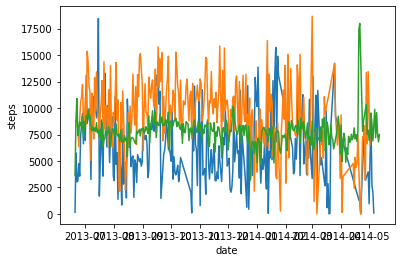

In [70]:
# A plot of a time series of mean steps per day over all participants 
sns.lineplot(data=mean_steps_weight_high, x="date", y="steps")  # 10 heaviest (blue line)
sns.lineplot(data=mean_steps_weight_low, x="date", y="steps")   # 10 lightests (orange line)
sns.lineplot(data=mean_steps_weight_total, x="date", y="steps") # all participants(green line)

The median of mean steps of top 10 heaviest people per day is: 5772.5 
The mean of mean steps of top 10 heaviest people  per day is: 6307.6778215223085 


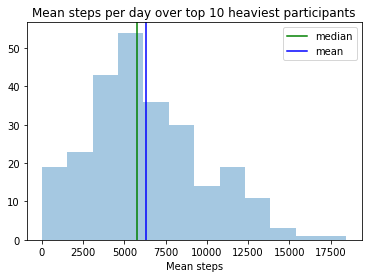

In [71]:
# An analysis of mean steps per day over top 10 heaviest participants : 
# Make a histogram, show the median and mean value.

mean_steps_weight_high['steps'].name = 'Mean steps' #Labeling the variable for plotting
steps_per_day_high = mean_steps_weight_high['steps'].dropna() #drop the NA's, otherwise Seaborn won't plot

median_mean_steps_high = mean_steps_weight_high['steps'].median()
mean_mean_steps_high = mean_steps_weight_high['steps'].mean()
print(f'The median of mean steps of top 10 heaviest people per day is: {median_mean_steps_high} ') 
print(f'The mean of mean steps of top 10 heaviest people  per day is: {mean_mean_steps_high} ') 

sns.distplot(steps_per_day_high, kde=False) 
plt.title('Mean steps per day over top 10 heaviest participants')
# Adds a vertical line at x-position median_size and x-position mean_size, from y = 0 to y = 100 
plt.axvline(median_mean_steps_high, 0, 100, color='green', label='median') 
plt.axvline(mean_mean_steps_high, 0, 100, color='blue', label='mean')   
plt.legend() #This adds a legend. 
plt.show()

The median of mean steps of top 10 lightest people per day is: 9496.5 
The mean of mean steps of top 10 lightest people per day is: 9394.919891395151 


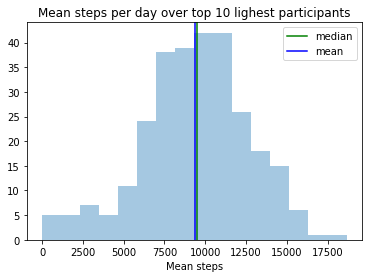

In [73]:
# An analysis of mean steps per day over 10 lightest weight participants : 
# Make a histogram, show the median and mean value.

mean_steps_weight_low['steps'].name = 'Mean steps' #Labeling the variable for plotting
steps_per_day_low = mean_steps_weight_low['steps'].dropna() #drop the NA's, otherwise Seaborn won't plot

median_mean_steps_low = mean_steps_weight_low['steps'].median()
mean_mean_steps_low = mean_steps_weight_low['steps'].mean()
print(f'The median of mean steps of top 10 lightest people per day is: {median_mean_steps_low} ') 
print(f'The mean of mean steps of top 10 lightest people per day is: {mean_mean_steps_low} ') 

sns.distplot(steps_per_day_low, kde=False) 
plt.title('Mean steps per day over top 10 lighest participants')
# Adds a vertical line at x-position median_size and x-position mean_size, from y = 0 to y = 100 
plt.axvline(median_mean_steps_low, 0, 100, color='green', label='median') 
plt.axvline(mean_mean_steps_low, 0, 100, color='blue', label='mean')   
plt.legend() #This adds a legend. 
plt.show()

The median of mean steps of all participants per day is: 7820.466252125851 
The mean of mean steps of all participants per day is: 7789.1864299503895 


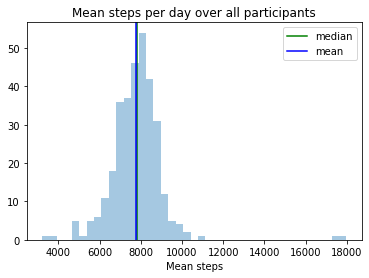

In [72]:
# An analysis of mean steps per day over all participants : 
# Make a histogram, show the median and mean value.

mean_steps_weight_total['steps'].name = 'Mean steps' #Labeling the variable for plotting
steps_per_day_total = mean_steps_weight_total['steps'].dropna() #drop the NA's, otherwise Seaborn won't plot

median_mean_steps_total = mean_steps_weight_total['steps'].median()
mean_mean_steps_total = mean_steps_weight_total['steps'].mean()
print(f'The median of mean steps of all participants per day is: {median_mean_steps_total} ') 
print(f'The mean of mean steps of all participants per day is: {mean_mean_steps_total} ') 

sns.distplot(steps_per_day_total, kde=False) 
plt.title('Mean steps per day over all participants')
# Adds a vertical line at x-position median_size and x-position mean_size, from y = 0 to y = 100 
plt.axvline(median_mean_steps_total, 0, 100, color='green', label='median') 
plt.axvline(mean_mean_steps_total, 0, 100, color='blue', label='mean')   
plt.legend() #This adds a legend. 
plt.show()

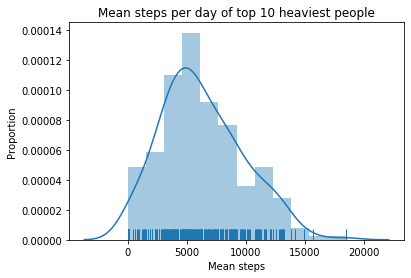

In [74]:
# Make a density plot, it "smoothes" the distribution and provides a model of the underlying distribution of mean steps.
# Add ticks at the actual values by using rug=True. 

sns.distplot(steps_per_day_high, rug=True)
plt.title('Mean steps per day of top 10 heaviest people')
plt.xlabel('Mean steps')
plt.ylabel('Proportion')
plt.show()

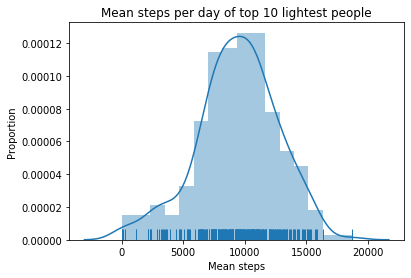

In [75]:
# Make a density plot, it "smoothes" the distribution and provides a model of the underlying distribution of mean steps.
# Add ticks at the actual values by using rug=True. 

sns.distplot(steps_per_day_low, rug=True)
plt.title('Mean steps per day of top 10 lightest people')
plt.xlabel('Mean steps')
plt.ylabel('Proportion')
plt.show()

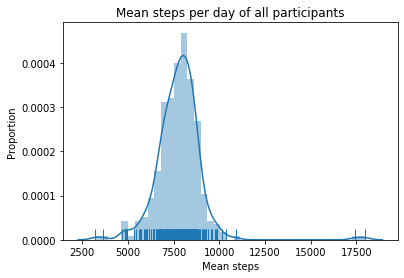

In [76]:
# Make a density plot, it "smoothes" the distribution and provides a model of the underlying distribution of mean steps.
# Add ticks at the actual values by using rug=True. 

sns.distplot(steps_per_day_total, rug=True)
plt.title('Mean steps per day of all participants')
plt.xlabel('Mean steps')
plt.ylabel('Proportion')
plt.show()

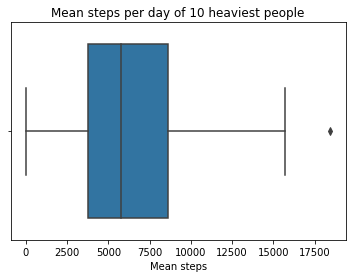

In [77]:
# Make a boxplot for the mean steps
# We can see some outliers lie far outside the trend,may be fault data.
 
sns.boxplot(steps_per_day_high)
plt.title('Mean steps per day of 10 heaviest people')
plt.xlabel('Mean steps')
plt.show()

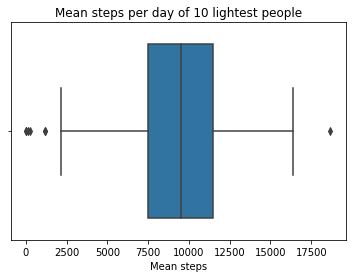

In [78]:
# Make a boxplot for the mean steps
# We can see some outliers lie far outside the trend,may be fault data.
 
sns.boxplot(steps_per_day_low)
plt.title('Mean steps per day of 10 lightest people')
plt.xlabel('Mean steps')
plt.show()

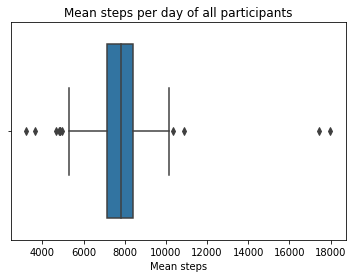

In [79]:
# Make a boxplot for the mean steps
# We can see some outliers lie far outside the trend,may be fault data.
 
sns.boxplot(steps_per_day_total)
plt.title('Mean steps per day of all participants')
plt.xlabel('Mean steps')
plt.show()

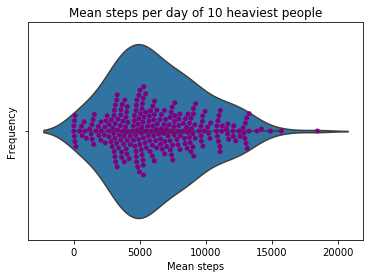

In [80]:
# Make a violin plot,it is a combination of a density plot and a boxplot
 
sns.violinplot(steps_per_day_high)
sns.swarmplot(steps_per_day_high, color='purple') 
plt.title('Mean steps per day of 10 heaviest people')
plt.ylabel('Frequency')
plt.xlabel('Mean steps')
plt.show()

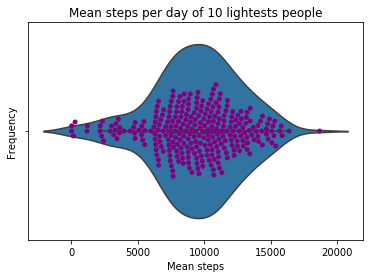

In [81]:
# Make a violin plot,it is a combination of a density plot and a boxplot
 
sns.violinplot(steps_per_day_low)
sns.swarmplot(steps_per_day_low, color='purple') 
plt.title('Mean steps per day of 10 lightests people')
plt.ylabel('Frequency')
plt.xlabel('Mean steps')
plt.show()

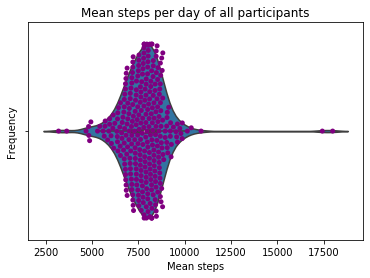

In [82]:
# Make a violin plot,it is a combination of a density plot and a boxplot
 
sns.violinplot(steps_per_day_total)
sns.swarmplot(steps_per_day_total, color='purple') 
plt.title('Mean steps per day of all participants')
plt.ylabel('Frequency')
plt.xlabel('Mean steps')
plt.show()

Verbal description of the distribution: normality, skewness, outliers, etc

From above histogram,density plot,boxplot and violin plot we can see:

The median of mean steps of top 10 heaviest people per day is: 5772.5 
The mean of mean steps of top 10 heaviest people  per day is: 6307.6778215223085 
mean value > median value, it's Right skewed，skewness > 0. 

The median of mean steps of top 10 lightest people per day is: 9496.5 
The mean of mean steps of top 10 lightest people per day is: 9394.919891395151 
mean value < median value, it's Left skewed，skewness < 0. 

The median of mean steps of all participants per day is: 7820.466252125851 
The mean of mean steps of all participants per day is: 7789.1864299503895 
mean value < median value, it's Left skewed，skewness < 0. 

There are some outliers lie far outside the trend, if more than 15000 may be faulty data.
Besides the outliers, we can see the data for all participants are near normally distributed.